# 航空公司客运流量预测

### 数据集

数据集有两列，分别是时间和客运流量，用到的主要是客运流量

** 导入模块 **

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Activation

Using TensorFlow backend.


In [93]:
import warnings
warnings.filterwarnings('ignore')

** 导入数据 **

In [94]:
#导入数据
df = pd.read_csv('../DATA/airData.csv', sep=',')
df = df.set_index('time')

In [95]:
df.head()

,passengers
time,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
1949-06,135
1949-07,148
1949-08,148
1949-09,136


** 画图 **

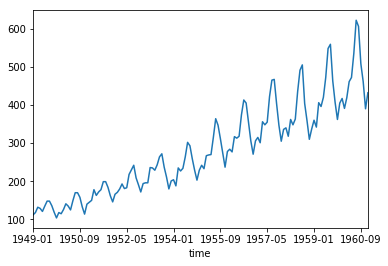

In [96]:
#画图
df['passengers'].plot()
plt.show()

** 数据预处理 **

In [97]:
#只用客运流量一列
df = pd.read_csv('DATA/data.csv', sep=',', usecols=[1])
data_all = np.array(df).astype(float)

In [98]:
#数据归一化
scaler = MinMaxScaler()
data_all = scaler.fit_transform(data_all)

**时间序列**

In [99]:
#时间序列
sequence_length=10
data = []
for i in range(len(data_all) - sequence_length - 1):
    data.append(data_all[i: i + sequence_length + 1])
reshaped_data = np.array(data).astype('float64')
reshaped_data

array([[[ 0.01544402],
        [ 0.02702703],
        [ 0.05405405],
        ..., 
        [ 0.06177606],
        [ 0.02895753],
        [ 0.        ]],

       [[ 0.02702703],
        [ 0.05405405],
        [ 0.04826255],
        ..., 
        [ 0.02895753],
        [ 0.        ],
        [ 0.02702703]],

       [[ 0.05405405],
        [ 0.04826255],
        [ 0.03281853],
        ..., 
        [ 0.        ],
        [ 0.02702703],
        [ 0.02123552]],

       ..., 
       [[ 0.4980695 ],
        [ 0.58108108],
        [ 0.6042471 ],
        ..., 
        [ 1.        ],
        [ 0.96911197],
        [ 0.77992278]],

       [[ 0.58108108],
        [ 0.6042471 ],
        [ 0.55405405],
        ..., 
        [ 0.96911197],
        [ 0.77992278],
        [ 0.68918919]],

       [[ 0.6042471 ],
        [ 0.55405405],
        [ 0.60810811],
        ..., 
        [ 0.77992278],
        [ 0.68918919],
        [ 0.55212355]]])

** 训练集和测试集 **

In [100]:
split = 0.8
np.random.shuffle(reshaped_data)
x = reshaped_data[:, :-1]
y = reshaped_data[:, -1]
split_boundary = int(reshaped_data.shape[0] * split)
train_x = x[: split_boundary]
test_x = x[split_boundary:]

train_y = y[: split_boundary]
test_y = y[split_boundary:]

In [101]:
train_x = np.reshape(train_x, (train_x.shape[0], train_x.shape[1], 1))
test_x = np.reshape(test_x, (test_x.shape[0], test_x.shape[1], 1))

** 搭建LSTM模型 **

In [102]:
#搭建LSTM模型
model = Sequential()
model.add(LSTM(input_dim=1, output_dim=50, return_sequences=True))
print(model.layers)
model.add(LSTM(100, return_sequences=False))
model.add(Dense(output_dim=1))
model.add(Activation('linear'))

model.compile(loss='mse', optimizer='rmsprop')

** 模型训练 **

In [109]:
model.fit(train_x, train_y, batch_size=512, nb_epoch=100, validation_split=0.1)
predict = model.predict(test_x)
predict = np.reshape(predict, (predict.size, ))

Train on 95 samples, validate on 11 samples
Epoch 1/100
95/95 [==============================] - 0s 253us/step - loss: 0.0117 - val_loss: 0.0073
Epoch 2/100
95/95 [==============================] - 0s 248us/step - loss: 0.0121 - val_loss: 0.0093
Epoch 3/100
95/95 [==============================] - 0s 242us/step - loss: 0.0116 - val_loss: 0.0073
Epoch 4/100
95/95 [==============================] - 0s 253us/step - loss: 0.0120 - val_loss: 0.0092
Epoch 5/100
95/95 [==============================] - 0s 274us/step - loss: 0.0115 - val_loss: 0.0072
Epoch 6/100
95/95 [==============================] - 0s 258us/step - loss: 0.0119 - val_loss: 0.0091
Epoch 7/100
95/95 [==============================] - 0s 258us/step - loss: 0.0114 - val_loss: 0.0072
Epoch 8/100
95/95 [==============================] - 0s 248us/step - loss: 0.0118 - val_loss: 0.0090
Epoch 9/100
95/95 [==============================] - 0s 274us/step - loss: 0.0113 - val_loss: 0.0071
Epoch 10/100
95/95 [===========================

Epoch 81/100
95/95 [==============================] - 0s 279us/step - loss: 0.0064 - val_loss: 0.0062
Epoch 82/100
95/95 [==============================] - 0s 258us/step - loss: 0.0067 - val_loss: 0.0045
Epoch 83/100
95/95 [==============================] - 0s 279us/step - loss: 0.0063 - val_loss: 0.0063
Epoch 84/100
95/95 [==============================] - 0s 242us/step - loss: 0.0065 - val_loss: 0.0044
Epoch 85/100
95/95 [==============================] - 0s 264us/step - loss: 0.0062 - val_loss: 0.0064
Epoch 86/100
95/95 [==============================] - 0s 253us/step - loss: 0.0064 - val_loss: 0.0044
Epoch 87/100
95/95 [==============================] - 0s 258us/step - loss: 0.0061 - val_loss: 0.0065
Epoch 88/100
95/95 [==============================] - 0s 248us/step - loss: 0.0064 - val_loss: 0.0045
Epoch 89/100
95/95 [==============================] - 0s 274us/step - loss: 0.0060 - val_loss: 0.0066
Epoch 90/100
95/95 [==============================] - 0s 269us/step - loss: 0.0063

** 比较 **

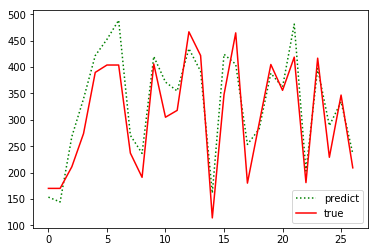

In [110]:
predict_y = scaler.inverse_transform([[i] for i in predict])
test = scaler.inverse_transform(test_y)

plt.plot(predict_y, 'g:', label='prediction')
plt.plot(test, 'r-', label='true')
plt.legend(['predict', 'true'])
plt.show()